TP 1

### Parte 1

In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams['axes.facecolor'] = 'white'
%matplotlib inline

#### Algoritmo de pasaje a coordenadas cromáticas

In [43]:
def chromatic_coord_transform(image: np.array) -> np.array:
    # Get divider 
    rgb_divider = np.sum(image, axis=2)
    # Expand array
    rgb_divider = rgb_divider[:,:,np.newaxis]
    return np.divide(image, rgb_divider, where=rgb_divider != 0)
    
    

In [44]:
# Load images
image_lst = list()
image_lst.append(cv.imread('coord_cromatica/CoordCrom_1.png'))
image_lst.append(cv.imread('coord_cromatica/CoordCrom_2.png'))
image_lst.append(cv.imread('coord_cromatica/CoordCrom_3.png'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/fvasconcelos/miniconda3/envs/conda_311/lib/python3.11/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


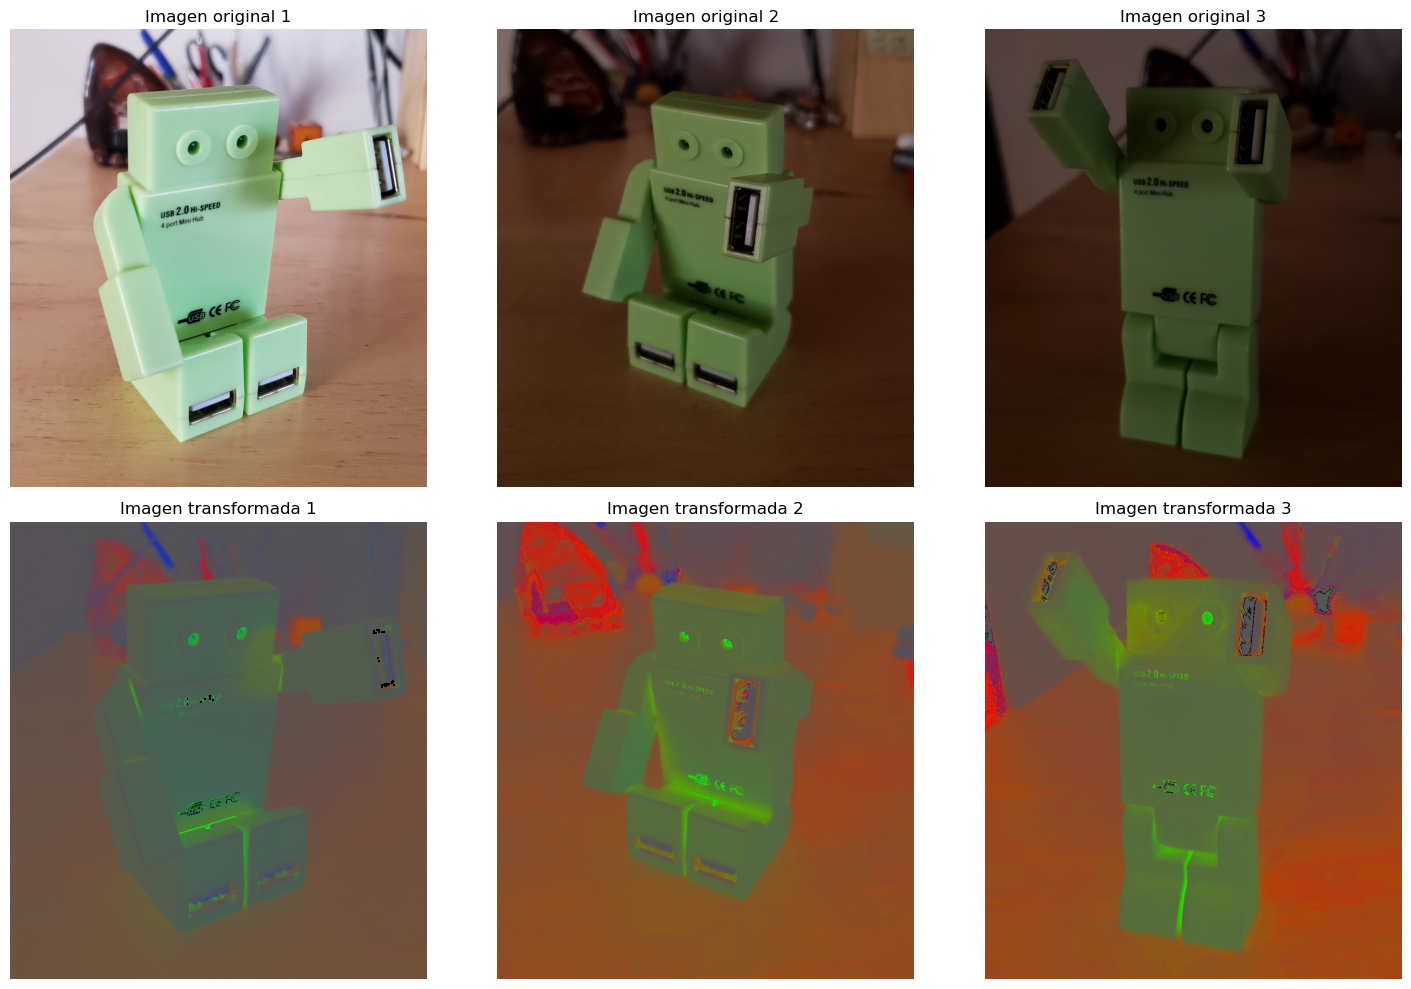

In [45]:
fig, axs = plt.subplots(2, 3, figsize=(15,10))

for index, image in enumerate(image_lst):
    axs[0, index].set_title('Imagen original '+ str(index+1))
    axs[0, index].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axs[0, index].axis('off')
    imageChromatic = chromatic_coord_transform(image)
    axs[1, index].set_title('Imagen transformada '+ str(index+1))
    axs[1, index].imshow(imageChromatic[:,:,::-1])
    axs[1, index].axis('off')


plt.tight_layout()
plt.show()

#### Algoritmo White Patch

In [46]:
def white_patch_transform(image: np.array, percentile=95):
    # Get RGB max value
    use_percentile = False
    rgb_max = np.max(image, axis=(0,1))
    if np.any(rgb_max == 255):
        rgb_max = np.percentile(image, percentile, axis=(0,1))
        use_percentile = True
    result_image = (255.0/rgb_max) * image
    return result_image.astype(np.uint8), use_percentile

In [47]:
# Load images
image_test_lst = list()
image_test_lst.append(cv.imread('white_patch/test_red.png'))
image_test_lst.append(cv.imread('white_patch/test_green.png'))
image_test_lst.append(cv.imread('white_patch/test_blue.png'))


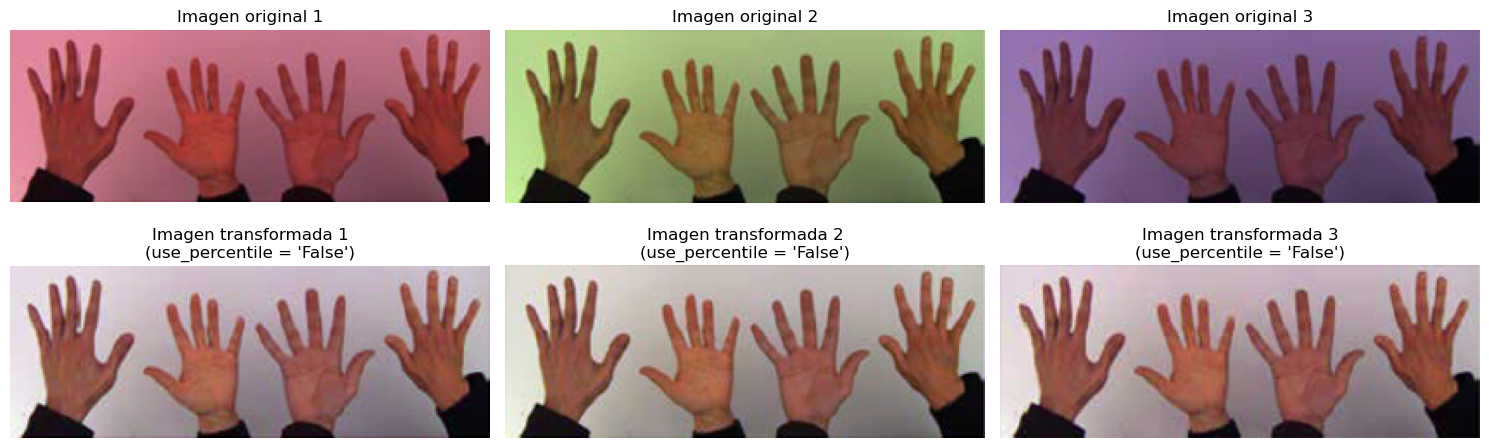

In [48]:
fig, axs = plt.subplots(2, 3, figsize=(15,5))

for index, image in enumerate(image_test_lst):
    axs[0, index].set_title('Imagen original '+ str(index+1))
    axs[0, index].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axs[0, index].axis('off')
    imageChromatic, use_percentile = white_patch_transform(image)
    axs[1, index].set_title('Imagen transformada '+ str(index+1) + "\n(use_percentile = '" + str(use_percentile) + "')")
    axs[1, index].imshow(imageChromatic[:,:,::-1])
    axs[1, index].axis('off')


plt.tight_layout()
plt.show()

In [49]:
image_wp_lst = list()
image_wp_lst.append(cv.imread('white_patch/wp_red.png'))
# image_wp_lst.append(cv.imread('white_patch/wp_red2.jpg'))
image_wp_lst.append(cv.imread('white_patch/wp_blue.jpg'))
image_wp_lst.append(cv.imread('white_patch/wp_green.png'))
# image_wp_lst.append(cv.imread('white_patch/wp_green2.jpg'))

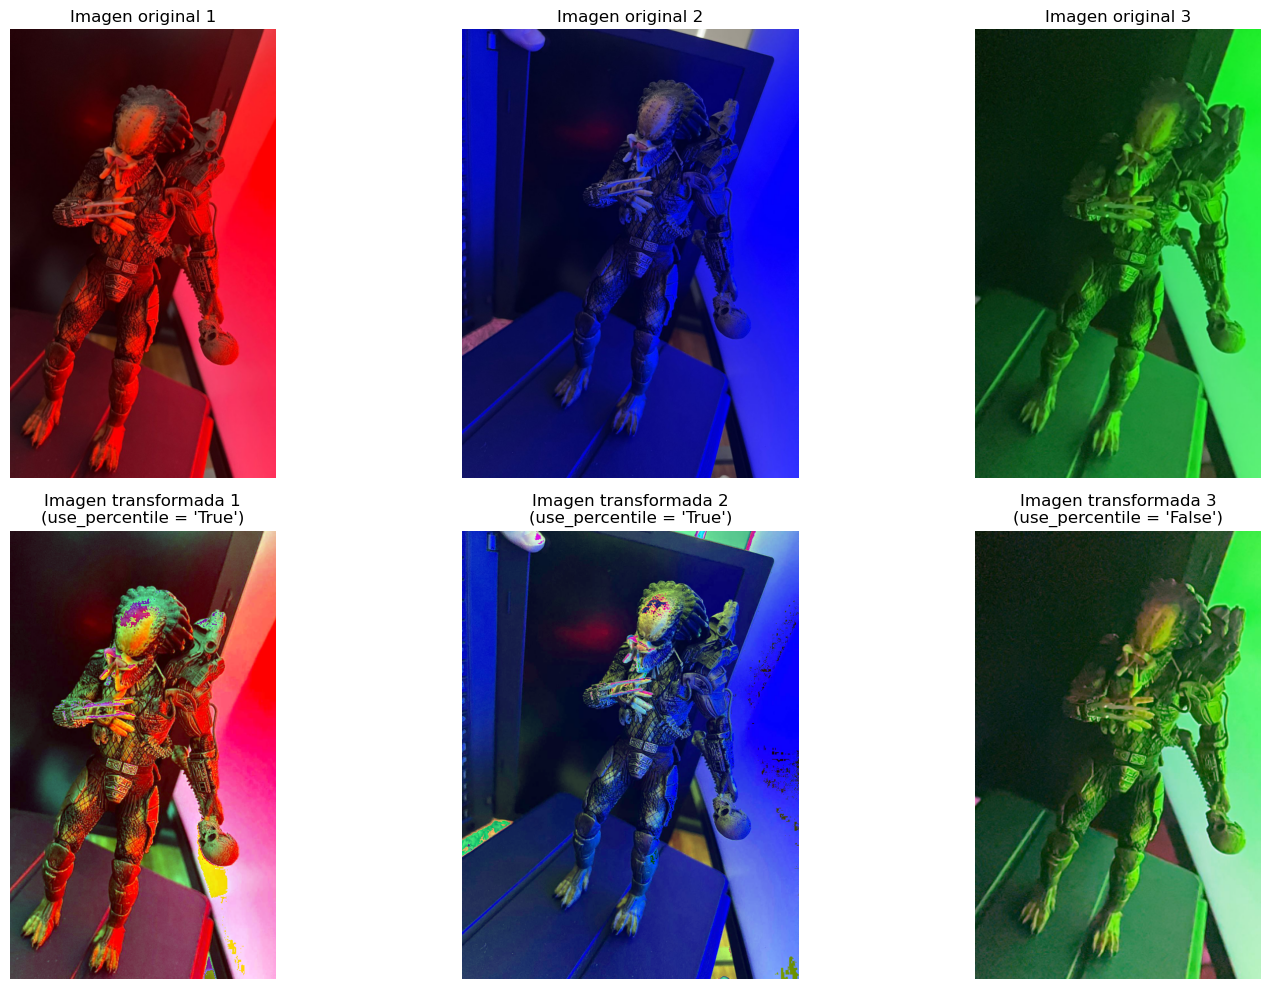

In [50]:
fig, axs = plt.subplots(2, len(image_wp_lst), figsize=(16,10))

for index, image in enumerate(image_wp_lst):
    axs[0, index].set_title('Imagen original '+ str(index+1))
    axs[0, index].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axs[0, index].axis('off')
    imageChromatic, use_percentile = white_patch_transform(image, percentile=99)
    axs[1, index].set_title('Imagen transformada '+ str(index+1) + "\n(use_percentile = '" + str(use_percentile) + "')")
    axs[1, index].imshow(imageChromatic[:,:,::-1])
    axs[1, index].axis('off')


plt.tight_layout()
plt.show()

In [51]:
image_wp_lst_2 = list()
image_wp_lst_2.append(cv.imread('white_patch/wp_red2.jpg'))
# image_wp_lst_2.append(cv.imread('white_patch/wp_blue.jpg'))
# image_wp_lst_2.append(cv.imread('white_patch/wp_green2.png'))
image_wp_lst_2.append(cv.imread('white_patch/wp_green2.jpg'))

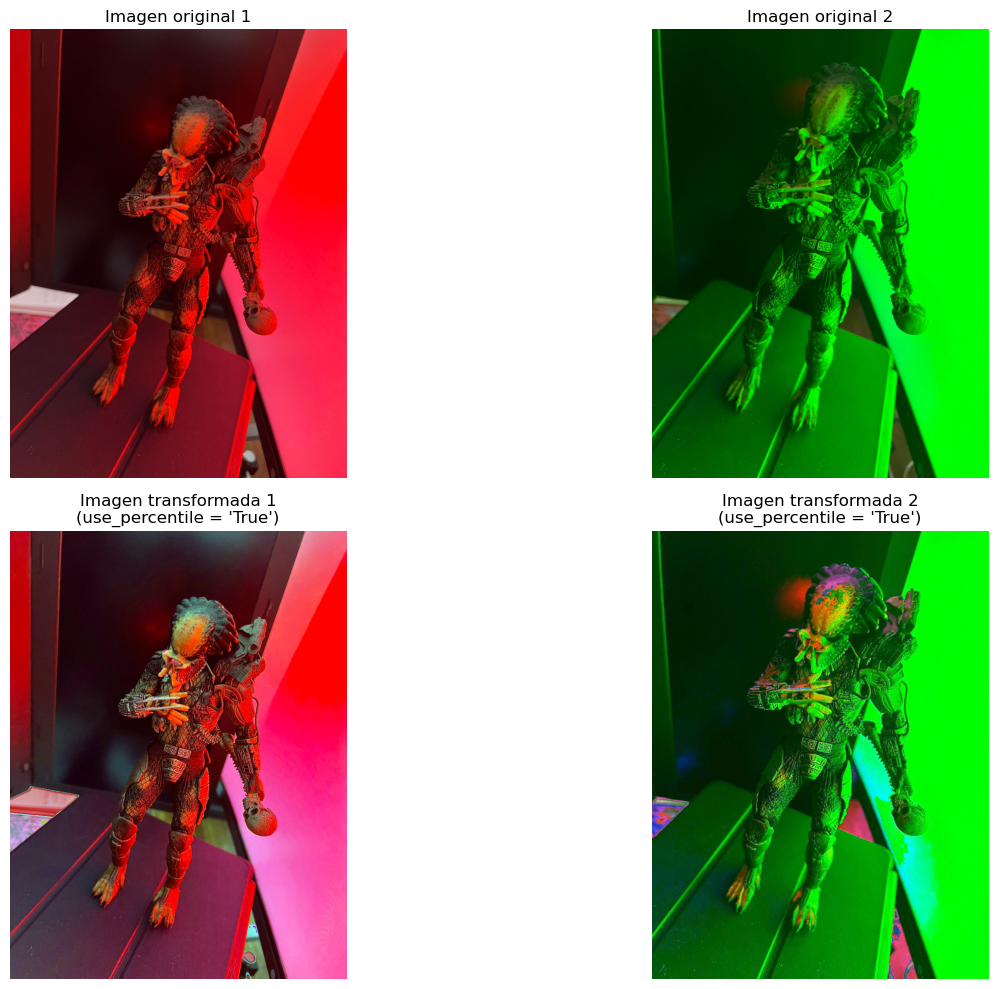

In [52]:
fig, axs = plt.subplots(2, len(image_wp_lst_2), figsize=(16,10))

for index, image in enumerate(image_wp_lst_2):
    axs[0, index].set_title('Imagen original '+ str(index+1))
    axs[0, index].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axs[0, index].axis('off')
    imageChromatic, use_percentile = white_patch_transform(image, percentile=99)
    axs[1, index].set_title('Imagen transformada '+ str(index+1) + "\n(use_percentile = '" + str(use_percentile) + "')")
    axs[1, index].imshow(imageChromatic[:,:,::-1])
    axs[1, index].axis('off')


plt.tight_layout()
plt.show()

##### Veamos el efecto del cambio de percentil en los casos en donde no podemos utilizar el maximo valor de RGB.

In [53]:
def show_wp_image(percentile):
    # print(percentile)
    image, use_percentile = white_patch_transform(image_wp_lst[1], percentile=percentile)
    plt.imshow(image[:,:,::-1])
    # plt.figure(figsize=(10,5))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

threshold_slider = widgets.IntSlider(value=90, min=1, max=100, step=1, description='Percentile') 
   
widgets.interact(show_wp_image, percentile=threshold_slider)    


interactive(children=(IntSlider(value=90, description='Percentile', min=1), Output()), _dom_classes=('widget-i…

<function __main__.show_wp_image(percentile)>

In [54]:
# imageCoord = np.zeros(imageRGB.shape)
# for i in range(imageRGB.shape[0]):
#     for j in range(imageRGB.shape[1]):
#         XYZ = np.sum(imageRGB[i,j,:])
#         imageCoord[i,j,:] = imageRGB[i,j,:]/XYZ if XYZ != 0 else 0       
# imageCoord = imageCoord

### Parte 2

In [75]:
image_lst = list()
image_lst.append(cv.imread("img1_tp.png", cv.IMREAD_GRAYSCALE))
image_lst.append(cv.imread("img2_tp.png", cv.IMREAD_GRAYSCALE))

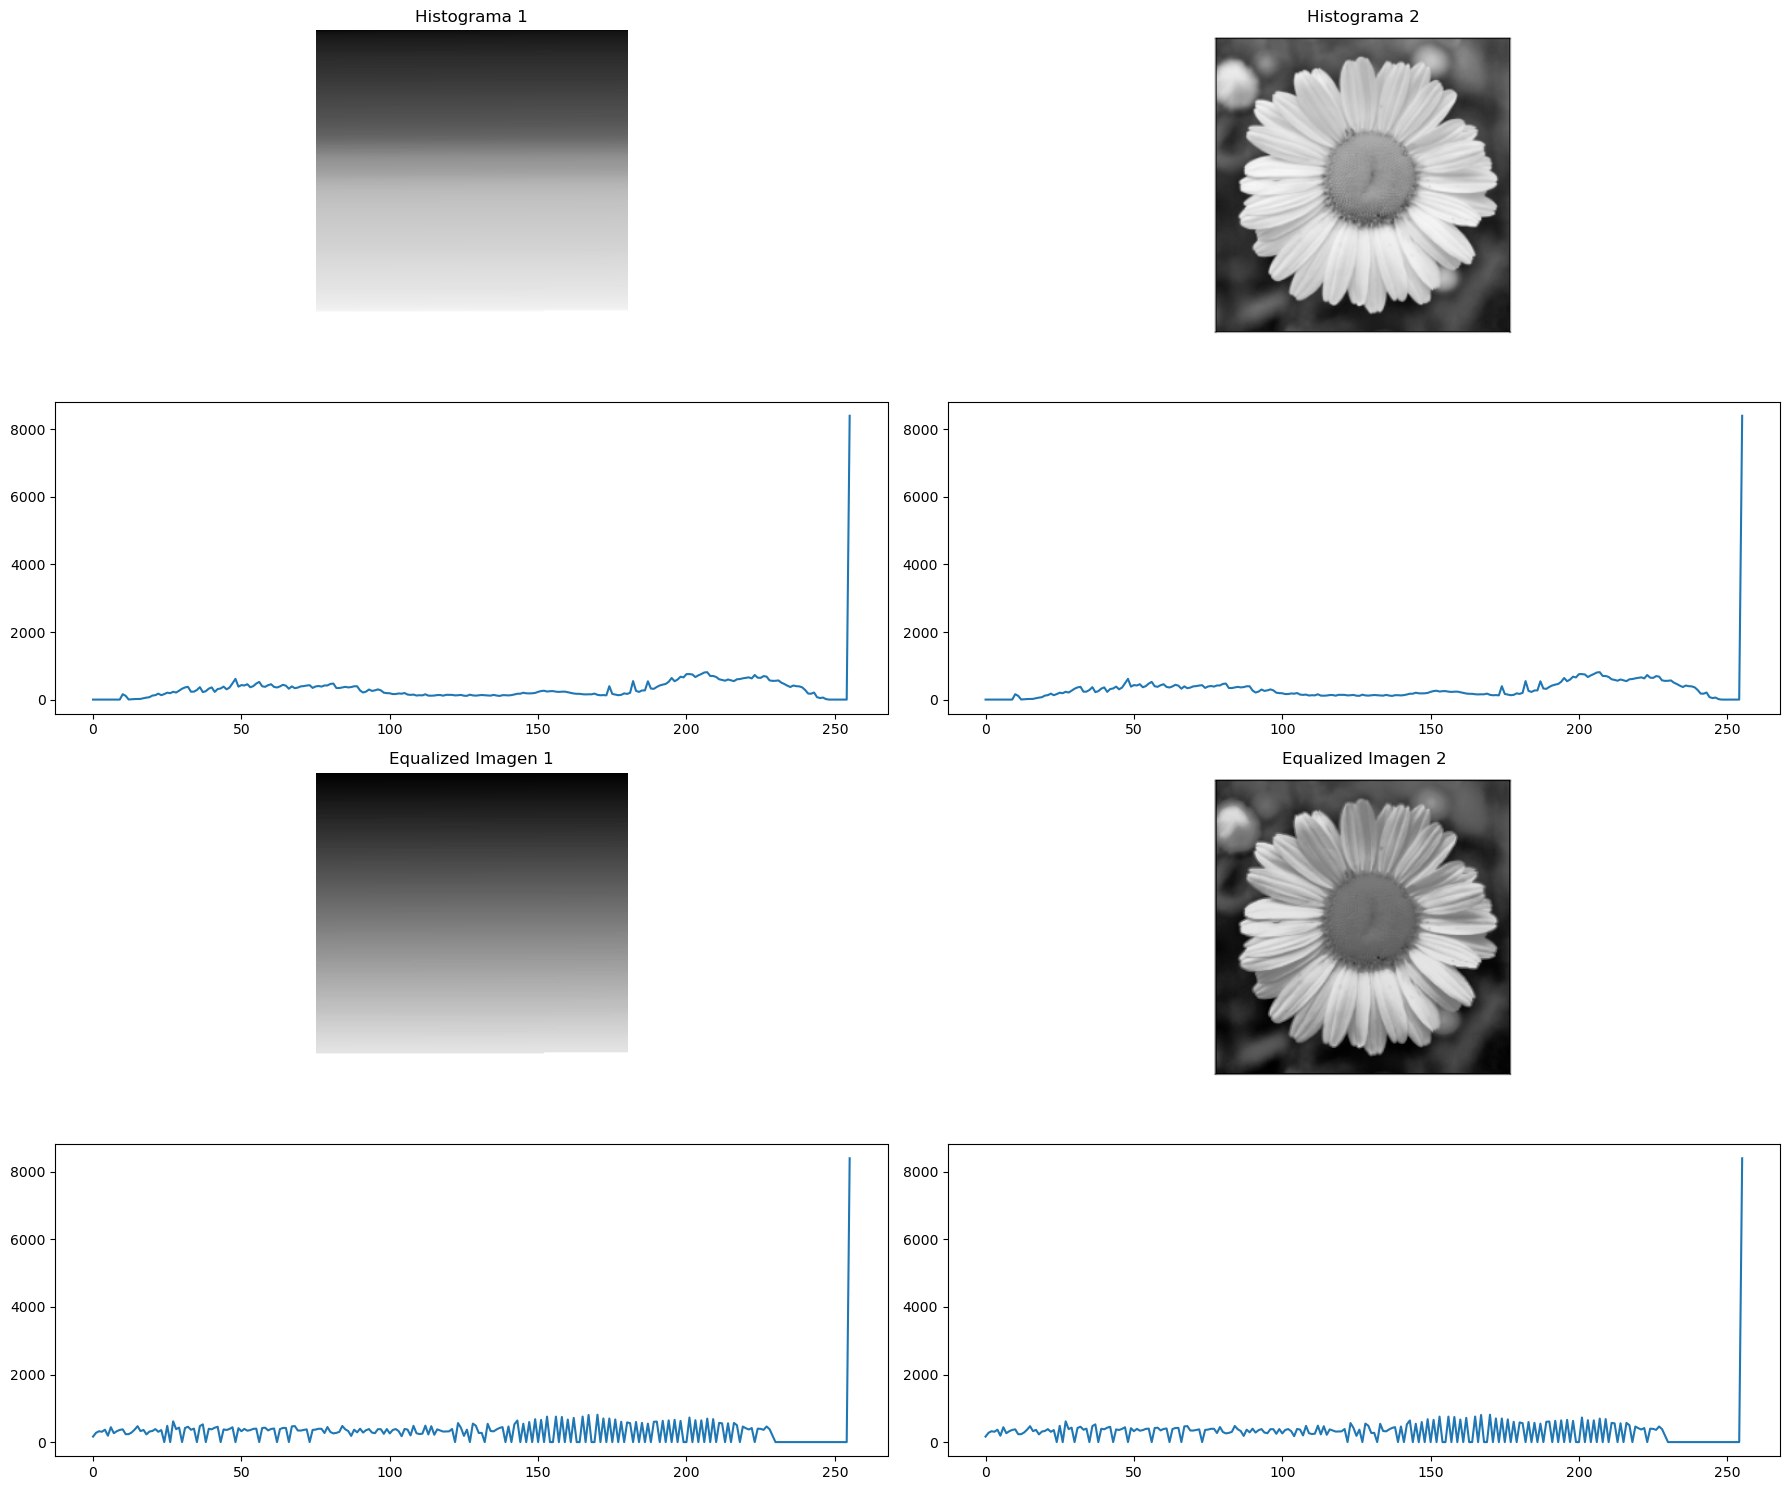

In [76]:
fig, axs = plt.subplots(4, 2, figsize=(18,15))

for index, image in enumerate(image_lst):
    axs[0, index].set_title('Imagen '+ str(index+1))
    axs[0, index].imshow(image, cmap='gray')
    axs[0, index].axis('off')
    axs[0, index].set_title('Histograma '+ str(index+1))
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])
    axs[1, index].plot(hist)
    axs[2, index].set_title('Equalized Imagen '+ str(index+1))
    equalized_image = cv.equalizeHist(image)
    axs[2, index].imshow(equalized_image, cmap='gray')
    axs[2, index].axis('off')
    hist, bins = np.histogram(equalized_image.ravel(), 256, [0, 256])
    axs[3, index].plot(hist)

plt.tight_layout()
plt.show()

In [57]:
image_1 = image_lst[0]
image_2 = image_lst[1]
image_1_flat = image_1.flatten()
image_2_flat = image_2.flatten()
# image_2 = image_2.sort()
image_2_flat_sort = np.sort(image_2_flat)
print("Image 1 " + str(image_1.shape))
print("Image 2 " + str(image_2.shape))
if np.array_equal(image_1_flat,image_2_flat_sort):
    print("There are equal")
else:
    print("There are some difference")

Image 1 (288, 287)
Image 2 (288, 287)
There are equal


Conclusiones:
Se observa que los histogramas son indeticos por lo tanto no se podria usar el histograma de la imagen como feauter para un problema de clasificación

#### Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas

In [63]:
seg_image = cv.imread("segmentacion.png")
rgb_seg_image = cv.cvtColor(seg_image, cv.COLOR_BGR2RGB)

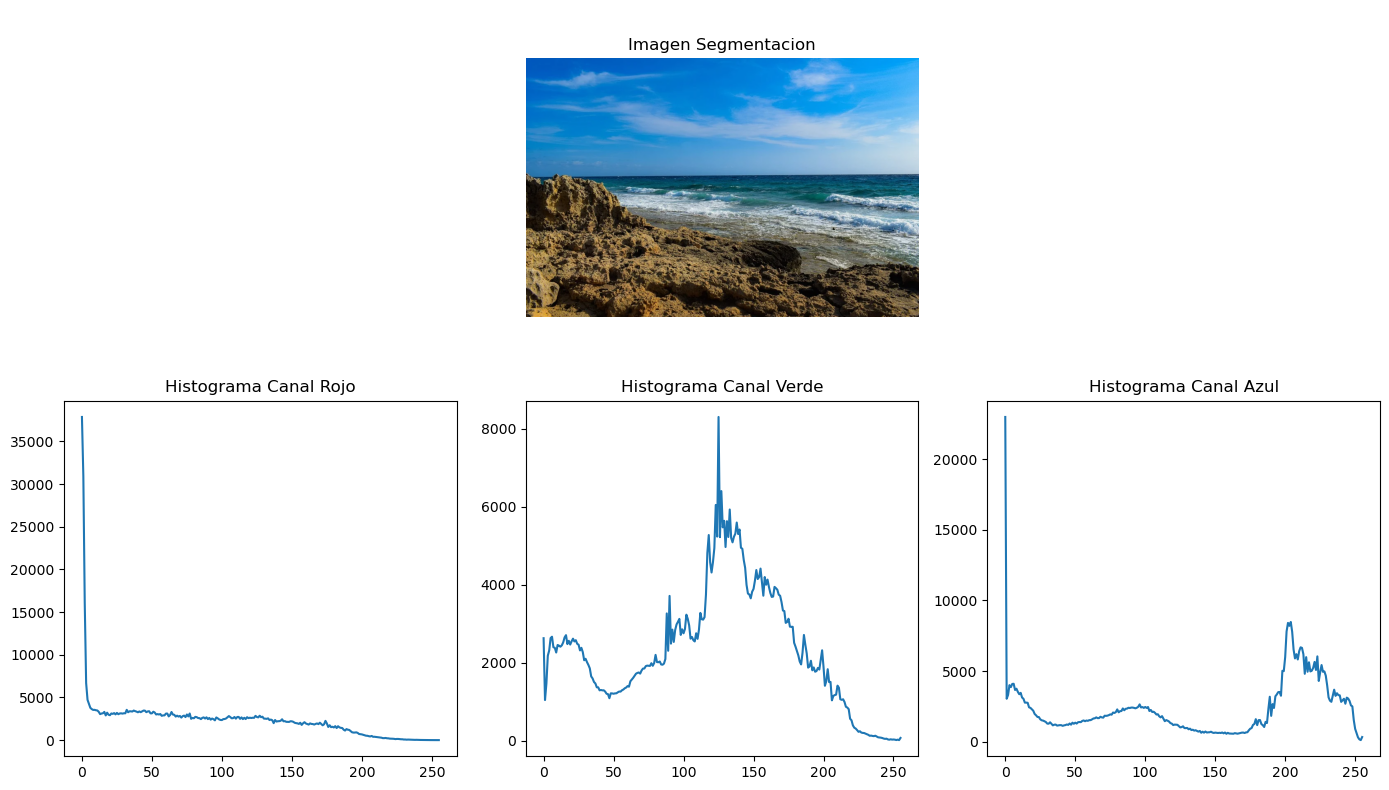

In [77]:
fig, axs = plt.subplots(2, 3, figsize=(14,8))


axs[0, 1].set_title('Imagen Segmentacion')
axs[0, 1].imshow(rgb_seg_image)
axs[0, 1].axis('off')
axs[0, 0].axis('off')
axs[0, 2].axis('off')

axs[1, 0].set_title('Histograma Canal Rojo')
axs[1, 1].set_title('Histograma Canal Verde')
axs[1, 2].set_title('Histograma Canal Azul')
for index in range(rgb_seg_image.shape[2]):
    hist, bins = np.histogram(rgb_seg_image[:,:,index].ravel(), 256, [0, 256])
    axs[1, index].plot(hist)

plt.tight_layout()
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

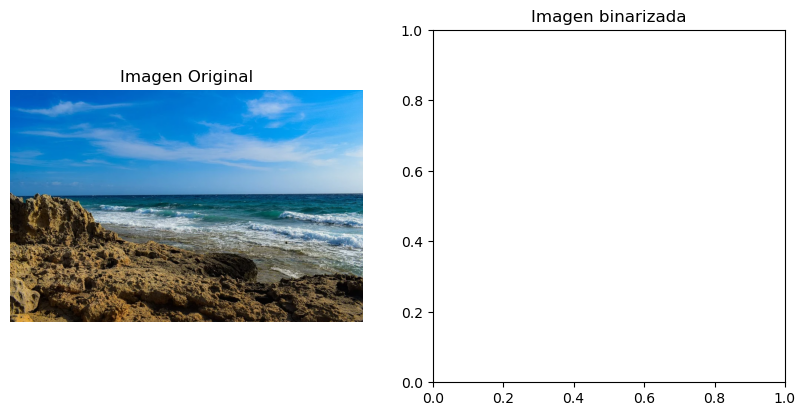

In [74]:
# seg_image_bin = cv.threshold(seg_image, 50, 200, cv.THRESH_BINARY)
# # seg_image_bin_rgb = cv.cvtColor(seg_image_bin, cv.COLOR_BGR2RGB)

# fig, axs = plt.subplots(1, 2, figsize=(10,5))


# axs[0].set_title('Imagen Original')
# axs[0].imshow(rgb_seg_image)
# axs[0].axis('off')
# axs[1].set_title('Imagen binarizada')
# axs[1].imshow(seg_image_bin, cmap='gray', vmin=0, vmax=1)
# axs[1].axis('off')